In [13]:
def plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,x_lim=[0,1],y_lim=[0,1],eq_min='true',N=11,title='unknown.png'):

    # ----- PLOTTING -----
    x = np.linspace(0,1,100)
    xx = np.linspace(xB,xD,100)
    
    # Plot results
    fig, ax = plt.subplots()

    plt.plot(x,x,color='k',linestyle='--')
    plt.plot(x,y(x),color='tab:blue',label = 'Eq. Line')
    plt.plot(xx,op_line(xx),color='tab:orange',label='R/S Line')
    plt.plot([xF,xq],[xF,mR*xq+bR],color='tab:red',marker='.',label='q-Line')
    plt.plot(x_1,y_1,linestyle='none',marker='.',color='tab:blue')
    plt.plot(x_eq,y_eq,color='k')
    
    if eq_min == 'true':
        A = x_eq[-1]
    else:
        A = y_eq[-1]
    
    plt.plot([x_eq[-1],x_eq[-1]],[0,A],marker='*',color='k',linestyle=':')
    plt.plot([x_eq[0], x_eq[0]],[0,y_eq[0]], linestyle=':',marker='*',color='k',\
             markerfacecolor='tab:orange',markeredgecolor='tab:orange')
    plt.plot([xB, xB],[0,xB], linestyle=':',marker='*',color='k',markerfacecolor='tab:orange',markeredgecolor='tab:orange')

    # Plot Labels, limits
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.xticks(np.linspace(x_lim[0],x_lim[1],N))
    plt.yticks(np.linspace(y_lim[0],y_lim[1],N))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    plt.tick_params(top='true', right='true', direction='in')
    plt.grid()

    # Pretty plot parameters
    font = {'family' : 'serif',
             'size'   : 12,
             'serif':  'cmr10'
             }

    plt.rcParams["figure.figsize"] = (5,3)
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": "cmr10",
    })

    plt.show()
    
    fig.savefig(title,dpi=150,bbox_inches='tight')

In [14]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import root_scalar
from scipy.interpolate import PchipInterpolator

# Import stepping function from parent directory, may need to modify
# if the location is different
import os
import sys
current = os.path.dirname(os.path.abspath('CHEN_3100_HW_9'))
parent = os.path.dirname(current)
sys.path.append(parent + '\CHEN_3100_Toolkit')
from CHEN_3100_Stepping import stepping_MT


# Import equilibrium data from CSV Excel file (must be in the same directory!),
# store as a dataframe
df = pd.read_csv('CHEN 3100 - HW 9 - W-nB Binary Data.csv')

# Sanity check the data 
display(df)

# Extract numerical quantities from the dataframe
x_1 = np.array(df['x'])
y_1 = np.array(df['y'])

P = 101.325 # kPa, system pressure


# Fit a 5th order polynomial to the data with the intercept set to 0,
# try not to 'overfit' the data
eq_line = lambda x, a5, a4, a3, a2, a1: a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x

# Get parameters and their estimated errors
params, p_cov = curve_fit(eq_line, x_1[0:13], y_1[0:13])

# Print parameters
print('6th order polynomial fit parameters: ')
print(params)
print('\n')

# Print estimated relative errors in the parameters
print('Relative error in fit parameters: ')
print(np.sqrt(np.diag(p_cov))/np.abs(params))
print('\n')

[a5,a4,a3,a2,a1] = params
# Print estimated R^2 value
R2 = 1 - np.sum((y_1[0:13]-eq_line(x_1[0:13],a5,a4,a3,a2,a1))**2)/np.sum((y_1-np.mean(y_1))**2)
print('R^2: %0.3f' % R2)



,T [K],x,y,xi,yi
0,390.88,0.000,0.000,1.000,1.000
1,384.10,0.050,0.253,0.861,0.923
2,380.00,0.092,0.388,0.730,0.839
3,379.60,0.097,0.402,0.607,0.747
4,374.00,0.181,0.556,0.491,0.646
5,369.80,0.291,0.660,0.382,0.537
6,369.50,0.303,0.666,0.279,0.418
7,367.20,0.417,0.724,0.181,0.290
8,366.20,0.546,0.750,0.088,0.151
9,366.20,0.550,0.753,0.000,0.000


6th order polynomial fit parameters: 
[ 12.25392457 -34.8307533   37.99202624 -20.40570187   5.7697817 ]


Relative error in fit parameters: 
[0.13026411 0.10854178 0.08219512 0.05126915 0.02063675]


R^2: 0.999


D = 250.000
B = 250.000


C:\Users\pheng\AppData\Local\Temp\ipykernel_26416\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


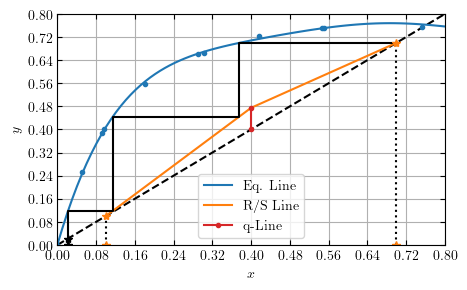

Bottoms Composition: 0.022


In [15]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
xF = 0.40
xD = 0.70
xB = 0.10
F = 500 # mol/hr
R = 3
xq = xF

# Distillate, Bottoms Flow
D = F*(xF-xB)/(xD-xB)
B = F - D
print('D = %0.3f' % D)
print('B = %0.3f' % B)

# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD
yq = mR*xq+bR

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])

y = lambda x: eq_line(x,a5,a4,a3,a2,a1)

x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# ----- PLOTTING -----
# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.8],[0,0.8],title='CHEN_3100_HW_9_1.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])

C:\Users\pheng\AppData\Local\Temp\ipykernel_26416\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


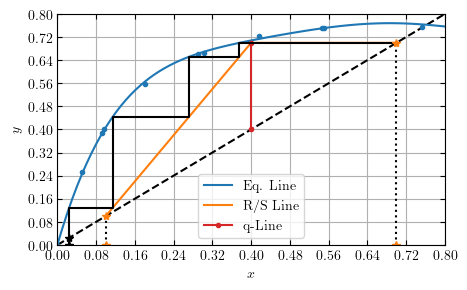

Bottoms Composition: 0.024


In [16]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a5,a4,a3,a2,a1)
xF = 0.40
xD = 0.70
xB = 0.10

xq = xF
yq = xD

# Rectifying slope/intercept
mR = (xD-yq)/(xD-xq)
bR = (1-mR)*xD


# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])


x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# ----- PLOTTING -----
# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.8],[0,0.8],title='CHEN_3100_HW_9_2.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])

C:\Users\pheng\AppData\Local\Temp\ipykernel_26416\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


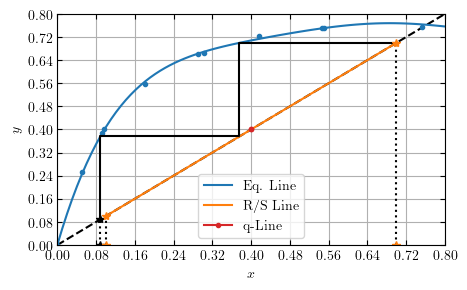

Bottoms Composition: 0.089


In [17]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
xF = 0.40
xD = 0.70
xB = 0.10
F = 500 # mol/hr
R = 3
xq = xF
yq = xq


# Rectifying slope/intercept
bR = 0
mR = 1

# Stripping slope/intercept
mS = 1
bS = 0

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])

y = lambda x: eq_line(x,a5,a4,a3,a2,a1)

x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# ----- PLOTTING -----
# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.8],[0,0.8],title='CHEN_3100_HW_9_3.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])

In [18]:
# Extract numerical quantities from the dataframe
x_1 = np.array(df['xi'])
y_1 = np.array(df['yi'])

x_1 = x_1[~np.isnan(x_1)]
y_1 = y_1[~np.isnan(y_1)]

P = 101.325 # kPa, system pressure


# Fit a 5th order polynomial to the data with the intercept set to 0,
# try not to 'overfit' the data
eq_line = lambda x, a6, a5, a4, a3, a2, a1: a6*x**6 + a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x

# Get parameters and their estimated errors
params, p_cov = curve_fit(eq_line, x_1, y_1)

# Print parameters
print('5th order polynomial fit parameters: ')
print(params)
print('\n')

# Print estimated relative errors in the parameters
print('Relative error in fit parameters: ')
print(np.sqrt(np.diag(p_cov))/np.abs(params))
print('\n')

[a6,a5,a4,a3,a2,a1] = params

# Print estimated R^2 value
R2 = 1 - np.sum((y_1-eq_line(x_1,a6,a5,a4,a3,a2,a1))**2)/np.sum((y_1-np.mean(y_1))**2)
print('R^2: %0.3f' % R2)


5th order polynomial fit parameters: 
[-0.39731829  1.42300116 -2.06239841  1.80185497 -1.61006713  1.84492271]


Relative error in fit parameters: 
[0.56356602 0.46340953 0.35370812 0.20749801 0.0542353  0.00397799]


R^2: 1.000


D = 250.000
B = 250.000


C:\Users\pheng\AppData\Local\Temp\ipykernel_26416\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


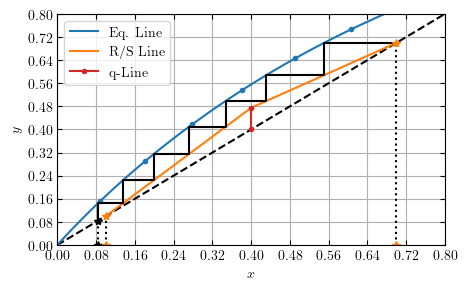

Bottoms Composition: 0.083


In [19]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
xF = 0.40
xD = 0.70
xB = 0.10
F = 500 # mol/hr
R = 3
xq = xF

# Distillate, Bottoms Flow
D = F*(xF-xB)/(xD-xB)
B = F - D
print('D = %0.3f' % D)
print('B = %0.3f' % B)

# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD
yq = mR*xq+bR

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])

y = lambda x: eq_line(x,a6,a5,a4,a3,a2,a1)

x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# ----- PLOTTING -----
# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.8],[0,0.8],title='CHEN_3100_HW_9_4.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])

C:\Users\pheng\AppData\Local\Temp\ipykernel_26416\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


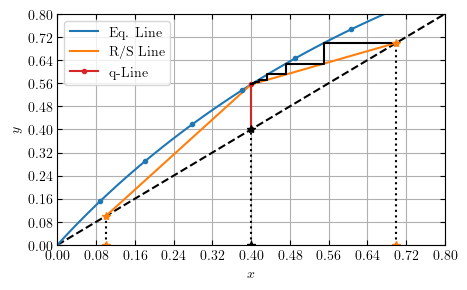

Bottoms Composition: 0.400
0.555823778008959
0.4805874066368033
0.9252517416356807


In [20]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
y = lambda x: eq_line(x,a6,a5,a4,a3,a2,a1)
xF = 0.40
xD = 0.70
xB = 0.10
F = 500 # mol/hr
xq = xF
yq = y(xq)


# Rectifying slope/intercept
mR = (xD-yq)/(xD-xq)
bR = (1-mR)*xD

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])


x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# ----- PLOTTING -----
# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.8],[0,0.8],title='CHEN_3100_HW_9_5.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])
print(yq)
print(mR)
print(mR/(1-mR))

C:\Users\pheng\AppData\Local\Temp\ipykernel_26416\3707108855.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


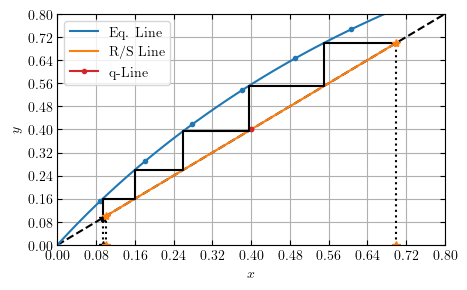

Bottoms Composition: 0.094


In [21]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
xF = 0.40
xD = 0.70
xB = 0.10
F = 500 # mol/hr
R = 3
xq = xF
yq = xq


# Rectifying slope/intercept
bR = 0
mR = 1

# Stripping slope/intercept
mS = 1
bS = 0

# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])

y = lambda x: eq_line(x,a6,a5,a4,a3,a2,a1)

x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# ----- PLOTTING -----
# Plot results
plot_MT(xF,xD,xB,x_eq,y_eq,y,op_line,[0,0.8],[0,0.8],title='CHEN_3100_HW_9_6.png')

print('Bottoms Composition: %0.3f' % x_eq[-1])

In [22]:
# Import equilibrium data from CSV Excel file (must be in the same directory!),
# store as a dataframe
df = pd.read_csv('CHEN 3100 - HW 9 - nP-nH Binary Data.csv')

# Sanity check the data 
display(df)

# Extract numerical quantities from the dataframe
x_1 = np.array(df['x'])
y_1 = np.array(df['y'])

P = 101.325 # kPa, system pressure


# Fit a 5th order polynomial to the data with the intercept set to 0,
# try not to 'overfit' the data
eq_line = lambda x, a6, a5, a4, a3, a2, a1: a6*x**6 + a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x

# Get parameters and their estimated errors
params, p_cov = curve_fit(eq_line, x_1, y_1)

# Print parameters
print('6th order polynomial fit parameters: ')
print(params)
print('\n')

# Print estimated relative errors in the parameters
print('Relative error in fit parameters: ')
print(np.sqrt(np.diag(p_cov))/np.abs(params))
print('\n')

[a6,a5,a4,a3,a2,a1] = params
# Print estimated R^2 value
R2 = 1 - np.sum((y_1-eq_line(x_1,a6,a5,a4,a3,a2,a1))**2)/np.sum((y_1-np.mean(y_1))**2)
print('R^2: %0.3f' % R2)


,x,y
0,1.000,1.000
1,0.926,0.992
2,0.858,0.983
3,0.795,0.973
4,0.736,0.962
5,0.682,0.949
6,0.631,0.936
7,0.583,0.922
8,0.539,0.906
9,0.498,0.889


6th order polynomial fit parameters: 
[ -9.01510808  32.38759505 -47.6000596   37.61916033 -17.95433496
   5.5619097 ]


Relative error in fit parameters: 
[0.07675203 0.06169141 0.04539224 0.02863516 0.01353351 0.00351986]


R^2: 1.000


C:\Users\pheng\AppData\Local\Temp\ipykernel_26416\224847968.py:20: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


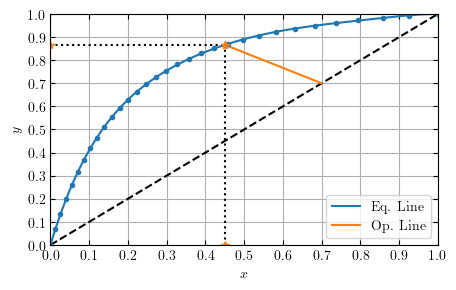

y = 0.866
x = 0.451


In [23]:
# ----- FLASH DISTILLATION -----
# Op. line slope/intercept
bR = 7/6
mR = -2/3
op_line = lambda x: mR*x + bR
y = lambda x: eq_line(x,a6,a5,a4,a3,a2,a1)

sol = root_scalar(lambda x: y(x)-op_line(x),x0=0.5)
xq = sol.root
yq = y(xq)


# ----- PLOTTING -----
# Plot results

x = np.linspace(0,1,100)
xx = np.linspace(bR/(1-mR),xq,2)

# Plot results
fig, ax = plt.subplots()

plt.plot(x,x,color='k',linestyle='--')
plt.plot(x,y(x),color='tab:blue',label = 'Eq. Line')
plt.plot(xx,op_line(xx),color='tab:orange',label='Op. Line')
plt.plot(x_1,y_1,linestyle='none',marker='.',color='tab:blue')


plt.plot([xq,xq],[0,yq], linestyle=':',marker='*',color='k',markerfacecolor='tab:orange',markeredgecolor='tab:orange')
plt.plot([0,xq],[yq,yq], linestyle=':',marker='*',color='k',markerfacecolor='tab:orange',markeredgecolor='tab:orange')

# Plot Labels, limits
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.tick_params(top='true', right='true', direction='in')
plt.grid()

# Pretty plot parameters
font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "cmr10",
})

plt.show()

fig.savefig('CHEN_3100_HW_9_7.png',dpi=600,bbox_inches='tight')

print('y = %0.3f' % yq)
print('x = %0.3f' % xq)
